In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# We load the original dataset and remove the rows that do not have a value in the Age column
df = pd.read_excel('BASE_DATOS.xlsx', engine='openpyxl')
print("Original number of records:", len(df))
print("Original number of variables:", len(df.columns))
df = df.drop(df[df['Edad'].isnull()].index)
print("Number of records after removing null rows:", len(df))

Original number of records: 2478
Original number of variables: 290
Number of records after removing null rows: 2422


In [66]:
# Function that counts the number of variables and records of a DataFrame

# INPUT:
# df: DataFrame with the data
# OUTPUT:
# n_variables: number of variables of the DataFrame
# n_records: number of records of the DataFrame

def count_variables_records(df):
    n_variables = len(df.columns)
    n_records = len(df)
    print('Number of variables:', n_variables)
    print('Number of records:', n_records)

# Function that removes the columns that exceed a given maximum percentage of null values

# INPUT:
# df: DataFrame with the data
# porcentage: maximum percentage of null values that a column can have
# OUTPUT:
# df: DataFrame with the columns that do not exceed the percentage of null values

def remove_columns_nulls(df, porcentage):
    # We calculate the maximum number of null values that a column can have
    max_nulls = len(df)*porcentage
    # We remove the columns that exceed the maximum number of null values
    df = df.dropna(axis=1, thresh=max_nulls)
    return df

**Initial analyses**

count    2422.000000
mean       66.036746
std        11.706265
min        28.000000
25%        58.000000
50%        66.000000
75%        75.000000
max        93.000000
Name: Edad, dtype: float64


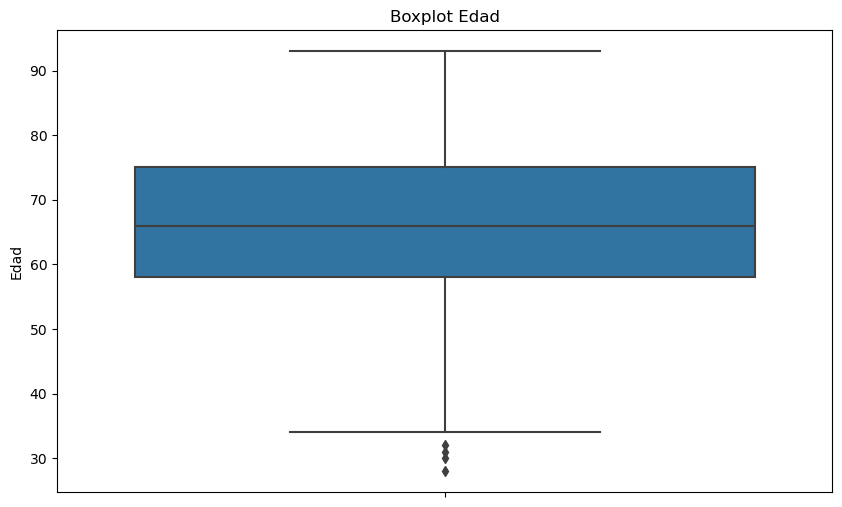

count    2418.000000
mean       66.095947
std        11.624837
min        34.000000
25%        58.000000
50%        66.000000
75%        75.000000
max        93.000000
Name: Edad, dtype: float64


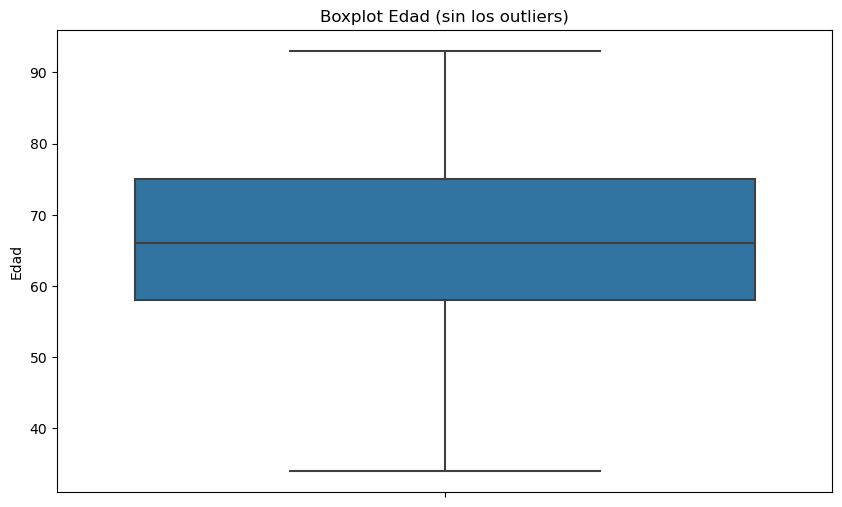

In [67]:
# statistical summary of the Age variable
print(df['Edad'].describe())

# box plot of the Age variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Edad'])
plt.title('Boxplot Edad')
plt.show()

Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1
# we calculate the lower and upper bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
# we remove the outliers
df = df[(df['Edad']>=lower_bound)&(df['Edad']<=upper_bound)]

# we calculate the new statistical summary of the Age variable
print(df['Edad'].describe())

# we plot the new box plot of the Age variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Edad'])
plt.title('Boxplot Edad (sin los outliers)')
plt.show()


In [68]:
# We show the patients with a weight difference greater than 5 to check if there are any outliers
df['diff_weight'] = df.apply(lambda row: row['Id'] if not pd.isnull(row['Peso']) and not pd.isnull(row['Peso.PSS']) and abs(row['Peso'] - row['Peso.PSS']) > 5 else None, axis=1)

# Now we show the patients with a height difference greater than 5 to check if there are any outliers
df['diff_height'] = df.apply(lambda row: row['Id'] if not pd.isnull(row['Talla']) and not pd.isnull(row['Talla.PSS']) and abs(row['Talla'] - row['Talla.PSS']) > 5 else None, axis=1)

ids_diff_weight = df.dropna(subset=['diff_weight'])['Id']
print("IDs with weight difference greater than 5:", ids_diff_weight.tolist())
ids_diff_height = df.dropna(subset=['diff_height'])['Id']
print("IDs with height difference greater than 5:", ids_diff_height.tolist())

# We correct the values of the variables

# Patient ID 865:
# We change the value of Weight from 30 to the value of Weight.PSS which is 80
df.loc[df['Id'] == 865, 'Peso'] = 80

# Patient ID 965:
# We exchange the values of Weight and Height(Talla)
df.loc[df['Id'] == 965, 'Peso'] = 90
df.loc[df['Id'] == 965, 'Talla'] = 170

# For the patient with ID 1097, we delete the value of FechaKT.PSS
df.loc[df['Id'] == 1097, 'FechaKT.PSS'] = None
# and we shift the values from Peso.PSS to UsaSkype one value to the right
shifted_values = df.loc[df['Id'] == 1097, 'Peso.PSS':'UsaSkype'].shift(1, axis=1)
for col in shifted_values.columns:
    df.loc[df['Id'] == 1097, col] = shifted_values[col]

# For the patient with ID 1229 we change the value of Peso.PSS to null and the height to 150
df.loc[df['Id'] == 1229, 'Peso.PSS'] = None
df.loc[df['Id'] == 1229, 'Talla'] = 150

# For the patient with ID 1264, the criterion chosen is to take the correct height as the average between the columns Talla and Talla.PSS
df.loc[df['Id'] == 1264, 'Talla'] = (df.loc[df['Id'] == 1264, 'Talla'] + df.loc[df['Id'] == 1264, 'Talla.PSS'])/2

# For the patient 2387, the height is 195
df.loc[df['Id'] == 2387, 'Talla'] = 195

# Se elimina el paciente con ID 733
df = df.drop(df[df['Id'] == 733].index)

IDs with weight difference greater than 5: [865, 965, 1097, 1150, 1229]
IDs with height difference greater than 5: [965, 1097, 1264, 2387]


C:\Users\juanm\AppData\Local\Temp\ipykernel_22900\3122311380.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted_values[col]
C:\Users\juanm\AppData\Local\Temp\ipykernel_22900\3122311380.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted_values[col]
C:\Users\juanm\AppData\Local\Temp\ipykernel_22900\3122311380.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted

In [69]:
# Check if any id has Diabetes = 1 and TratamientoDM not null
ids_diabetes_tratamiento = df[(df['Diabetes'] == 1) & (df['TratamientoDM'].notnull())]['Id']
print("IDs with Diabetes = 1 and TratamientoDM not null:", ids_diabetes_tratamiento.tolist())

# We assign a 2 for Diabetes to the patient with ID 1056
df.loc[df['Id'] == 1056, 'Diabetes'] = 2

# We assign a 2 for DiabetesPre.PSS to the patient with ID 1097
df.loc[df['Id'] == 1097, 'DiabetesPre.PSS'] = 2

# We assign a 2 for DiabetesPre.PSS to the patient with ID 1685
df.loc[df['Id'] == 1685, 'DiabetesPre.PSS'] = 2

# We assign a 2 for DiabetesPre.PSS to the patient with ID 1822
df.loc[df['Id'] == 1822, 'DiabetesPre.PSS'] = 2

# We assign a 2 for DiabetesPre.PSS to the patient with ID 1927
df.loc[df['Id'] == 1927, 'DiabetesPre.PSS'] = 2

IDs with Diabetes = 1 and TratamientoDM not null: [1056, 2122]


In [70]:
# Null values in Diabetes are filled with the values from DiabetesPre.PSS
df['Diabetes'] = df['Diabetes'].fillna(df['DiabetesPre.PSS'])
# Null values in DiabetesPre.PSS are filled with the values from Diabetes
df['DiabetesPre.PSS'] = df['DiabetesPre.PSS'].fillna(df['Diabetes'])

# We extract the IDs of those who have different values between Diabetes and DiabetesPre.PSS
ids_diabetes_diff = df[(df['Diabetes'] != df['DiabetesPre.PSS'])]['Id']
print("IDs with different values between Diabetes and Diabetes.PSS:", ids_diabetes_diff.tolist())

IDs with different values between Diabetes and Diabetes.PSS: [763, 1099, 1172, 1546, 1602, 1740]


**MEDICAL HISTORY**

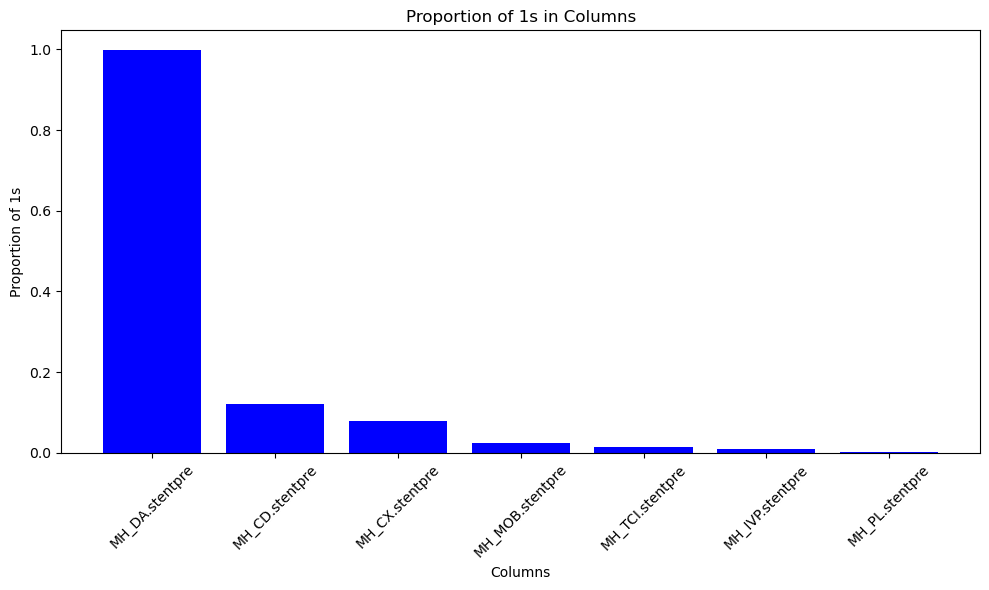

Number of variables: 20
Number of records: 2417
ID [   1    2    3 ... 2476 2477 2478]
MH_Edad [1, 3, 2]
Categories (3, int64): [1 < 2 < 3]
MH_Sexo [2. 1.]
MH_IMC [4, 3, 2, 1, NaN]
Categories (4, int64): [1 < 2 < 3 < 4]
MH_HFdeC.isquemica [1. 2.]
MH_Fumador [ 1.  3.  2. nan]
MH_TratamientoDM [0. 3. 2. 1.]
MH_Hipertension [ 2.  1. nan]
MH_Dislipemia [ 2.  1. nan]
MH_IRC [ 1.  2. nan]
MH_HBpreKT [3, 1, 2, NaN]
Categories (3, int64): [1 < 2 < 3]
MH_QXcoronariapre [ 1. nan  2.]
MH_AnoACTPprevia [0, 3, 2, 1, NaN]
Categories (4, int64): [1 < 2 < 3 < 0]
MH_EnfArtPerif.pre [ 1.  2. nan]
MH_ACVpre [ 1.  4. nan  3.  2.]
Muerte [ 0.  1. nan]
MuerteCV [ 0.  1. nan  3.]
IAM [ 0.  2.  1. nan]
Hemorragia [ 0.  1. nan]
MH_stentpre [0 1]


In [71]:
# We define a DataFrame with the antecedent columns and we put "MH" in front of the columns to classify them excepto para la id y renombramos al ingles.
df_mh = df[['Id', 'Edad', 'Sexo', 'Peso', 'Talla', 'HFdeC.isquemica', 'Fumador', 'Diabetes', 'TratamientoDM', 'Hipertension', 'Dislipemia', 'IRC', 'Filtrado Glomerular', 'HBpreKT', 'InfartoAntiguo', 'LocIAMprevio', 'QXcoronariapre', 'AnoQXcoronariapre', 'PuentesQxpre.Tx', 'ACTPprevia', 'AnoACTPprevia', 'TCI.stentpre', 'DA.stentpre', 'Cx.stentpre', 'MOB.stentpre', 'CD.stentpre', 'PL.stentpre', 'IVP.stentpre', 'EnfArtPerif.pre', 'ACVpre', 'CHA2DS2VASC', 'CHADS2', 'Grace', 'PreciseDAPT']].rename(columns={'Id': 'ID', 'Edad': 'MH_Edad', 'Sexo': 'MH_Sexo', 'Peso': 'MH_Peso', 'Talla': 'MH_Talla', 'HFdeC.isquemica': 'MH_HFdeC.isquemica', 'Fumador': 'MH_Fumador', 'Diabetes': 'MH_Diabetes', 'TratamientoDM': 'MH_TratamientoDM', 'Hipertension': 'MH_Hipertension', 'Dislipemia': 'MH_Dislipemia', 'IRC': 'MH_IRC', 'Filtrado Glomerular': 'MH_Filtrado_Glomerular', 'HBpreKT': 'MH_HBpreKT', 'InfartoAntiguo': 'MH_InfartoAntiguo', 'LocIAMprevio': 'MH_LocIAMprevio', 'QXcoronariapre': 'MH_QXcoronariapre', 'AnoQXcoronariapre': 'MH_AnoQXcoronariapre', 'PuentesQxpre.Tx': 'MH_PuentesQxpre.Tx', 'ACTPprevia': 'MH_ACTPprevia', 'AnoACTPprevia': 'MH_AnoACTPprevia', 'TCI.stentpre': 'MH_TCI.stentpre', 'DA.stentpre': 'MH_DA.stentpre', 'Cx.stentpre': 'MH_CX.stentpre', 'MOB.stentpre': 'MH_MOB.stentpre', 'CD.stentpre': 'MH_CD.stentpre', 'PL.stentpre': 'MH_PL.stentpre', 'IVP.stentpre': 'MH_IVP.stentpre', 'EnfArtPerif.pre': 'MH_EnfArtPerif.pre', 'ACVpre': 'MH_ACVpre', 'CHA2DS2VASC': 'MH_CHA2DS2VASC', 'CHADS2': 'MH_CHADS2', 'Grace': 'MH_Grace', 'PreciseDAPT': 'MH_PreciseDAPT'})

# We also add the columns "Muerte", "Muerte CV", "IAM" and "Hemorragia" to the DataFrame
df_mh.loc[:, 'Muerte'] = df['Muerte'].apply(lambda x: 1 if isinstance(x, datetime) or pd.notna(x) and x != 0 else x)
df_mh.loc[:, 'MuerteCV'] = df['Muerte CV']
df_mh.loc[:, 'IAM'] = df['IAM']
df_mh.loc[:, 'Hemorragia'] = df['Hemorragia']

# We discretize the variable MH_Edad using the terciles
terciles = df_mh['MH_Edad'].quantile([0.33, 0.66])
df_mh.loc[:, 'MH_Edad'] = pd.cut(df_mh['MH_Edad'],
                                    bins=[df_mh['MH_Edad'].min()-1, terciles[0.33], terciles[0.66], df_mh['MH_Edad'].max()],
                                    labels=[1, 2, 3])

# We complete the missing values of MH_Peso with the values of Peso.PSS of the original DataFrame
df_mh.loc[:, 'MH_Peso'] = df_mh['MH_Peso'].fillna(df['Peso.PSS'])

# We complete the missing values of MH_Talla with the values of Talla.PSS of the original DataFrame
df_mh.loc[:, 'MH_Talla'] = df_mh['MH_Talla'].fillna(df['Talla.PSS'])

# We categorize the variables MH_Peso and MH_Talla (height), for this we use the BMI
df_mh.loc[:, 'MH_Peso'] = df_mh['MH_Peso'] / (df_mh['MH_Talla']/100)**2
bins = [0, 18.5, 25, 30, np.inf]
labels = [1, 2, 3, 4]
df_mh.rename(columns={'MH_Peso': 'MH_IMC'}, inplace=True)
df_mh.loc[:, 'MH_IMC'] = pd.cut(df_mh['MH_IMC'], bins=bins, labels=labels)
df_mh.drop('MH_Talla', axis=1, inplace=True) # we remove the column Talla

# We complete the missing values of MH_TratamientoDM with 0
df_mh.loc[:, 'MH_TratamientoDM'] = df_mh['MH_TratamientoDM'].fillna(0)

# We remove the variable MH_Diabetes because it is redundant with MH_TratamientoDM
df_mh.drop('MH_Diabetes', axis=1, inplace=True)

# We discretize the variable MH_HBpreKT using the terciles
terciles = df_mh['MH_HBpreKT'].quantile([0.33, 0.66])
df_mh.loc[:, 'MH_HBpreKT'] = pd.cut(df_mh['MH_HBpreKT'],
                                    bins=[df_mh['MH_HBpreKT'].min()-1, terciles[0.33], terciles[0.66], df_mh['MH_HBpreKT'].max()],
                                    labels=[1, 2, 3])

# We complete with a 0 in MH_LocIAMprevio if MH_InfartoAntiguo is 1
df_mh.loc[df_mh['MH_InfartoAntiguo'] == 1, 'MH_LocIAMprevio'] = 0

# If InfartoAntiguo=2 and LocIAMprevio is null, set LocIAMprevio=5
df_mh.loc[(df_mh['MH_InfartoAntiguo'] == 2) & (df_mh['MH_LocIAMprevio'].isnull()), 'LocIAMprevio'] = 5

# We remove the variable MH_InfartoAntiguo because it is redundant with MH_LocIAMprevio
df_mh.drop('MH_InfartoAntiguo', axis=1, inplace=True)

# Discretizamos la variable MH_AnoACTPprevia usando los terciles
terciles = df_mh['MH_AnoACTPprevia'].quantile([0.33, 0.66])
df_mh['MH_AnoACTPprevia'] = pd.cut(df_mh['MH_AnoACTPprevia'],
                                   bins=[df_mh['MH_AnoACTPprevia'].min()-1, terciles[0.33], terciles[0.66], df_mh['MH_AnoACTPprevia'].max()],
                                   labels=[1, 2, 3])

# Convertir a categoría
df_mh['MH_AnoACTPprevia'] = df_mh['MH_AnoACTPprevia'].astype('category')

# Ajustar las categorías permitidas
df_mh['MH_AnoACTPprevia'] = df_mh['MH_AnoACTPprevia'].cat.add_categories([0])

# Si ACTPprevia=1 establecemos AnoACTPprevia=0
df_mh.loc[df_mh['MH_ACTPprevia'] == 1, 'MH_AnoACTPprevia'] = 0

# We remove the variable MH_ACTPprevia because it is redundant
df_mh.drop('MH_ACTPprevia', axis=1, inplace=True)

columns = ['MH_TCI.stentpre', 'MH_DA.stentpre', 'MH_CX.stentpre', 'MH_MOB.stentpre', 'MH_CD.stentpre', 'MH_PL.stentpre', 'MH_IVP.stentpre']
proportions = {}
for col in columns:
    count_1 = df_mh[col].value_counts().get(1, 0)
    count_0 = df_mh[col].value_counts().get(0, 0)
    proportion_1 = count_1 / (count_0 + count_1) if (count_0 + count_1) != 0 else 0
    proportions[col] = proportion_1
sorted_proportions = dict(sorted(proportions.items(), key=lambda item: item[1], reverse=True))
# we plot the proportion of 1s in the columns
plt.figure(figsize=(10, 6))
plt.bar(sorted_proportions.keys(), sorted_proportions.values(), color='blue')
plt.xlabel('Columns')
plt.ylabel('Proportion of 1s')
plt.title('Proportion of 1s in Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# We complete DA.stentpre with 0
df_mh['MH_DA.stentpre'] = df_mh['MH_DA.stentpre'].fillna(0)

# We create a new column 'MH_stentpre' that is 1 if any of the columns 'MH_TCI.stentpre', 'MH_DA.stentpre', 'MH_CX.stentpre', 'MH_MOB.stentpre', 'MH_CD.stentpre', 'MH_PL.stentpre', 'MH_IVP.stentpre' is 1, otherwise it is 0
df_mh['MH_stentpre'] = df_mh.apply(lambda row: 0 if (row['MH_TCI.stentpre'] == 0 and 
                                                     row['MH_DA.stentpre'] == 0 and 
                                                     row['MH_CX.stentpre'] == 0 and 
                                                     row['MH_MOB.stentpre'] == 0 and 
                                                     row['MH_CD.stentpre'] == 0 and 
                                                     row['MH_PL.stentpre'] == 0 and 
                                                     row['MH_IVP.stentpre'] == 0)
                                    else 1, axis=1)

# We drop the columns 'MH_TCI.stentpre', 'MH_DA.stentpre', 'MH_CX.stentpre', 'MH_MOB.stentpre', 'MH_CD.stentpre', 'MH_PL.stentpre', 'MH_IVP.stentpre'
columns_to_drop = ['MH_TCI.stentpre', 'MH_DA.stentpre', 'MH_CX.stentpre', 'MH_MOB.stentpre', 'MH_CD.stentpre', 'MH_PL.stentpre', 'MH_IVP.stentpre']
df_mh.drop(columns=columns_to_drop, inplace=True)

# We remove the variable MH_CHA2DS2VASC because it is redundant
df_mh.drop('MH_CHA2DS2VASC', axis=1, inplace=True)

# We remove the variable MH_LocIAMprevio because it is redundant
df_mh.drop('MH_LocIAMprevio', axis=1, inplace=True)

# We remove the columns that exceed 25% of null values
df_mh = remove_columns_nulls(df_mh, 0.25)

count_variables_records(df_mh)

df_mh.to_csv('medicalhistory.csv', index=False)

# We print the unique values of the columns
for i in df_mh.columns:
    print(i, df_mh[i].unique())

# just to check (to be removed)
df_mh.to_excel('medicalhistorytest.xlsx', index=False)

**PROCEDURE**

In [72]:
# We define a DataFrame with the columns of the procedures and we put a P in front of the columns to classify them
df_proc = df[['Id', 'Unnamed: 34', 'FE', 'Indicacion', 'IndicacionIAMCEST', 'Acceso', 'TCI.Actual', 'DA.Actual', 'CX.Actual', 'CD.Actual', 'Mamaria.Actual', 'Safena.Actual', 'TratDecidido', 'FechaQx.Actual', 'Puentes.Actual', 'ACVQX.Actual', 'InfartoQX.Actual', 'MuerteQX.Actual', 'MuerteQXtexto', 'TCI.tratada', 'DA.tratada', 'Cx.tratada', 'CD.tratada', 'Mamaria.tratada', 'Safena.tratada', 'Lesiones Tratadas', 'SINTAX1', 'SINTAX2']].rename(columns={'Id': 'ID', 'Unnamed: 34': 'P_Unnamed', 'FE': 'P_FE', 'Indicacion': 'P_Indicacion', 'IndicacionIAMCEST': 'P_IndicacionIAMCEST', 'Acceso': 'P_Acceso', 'TCI.Actual': 'P_TCI.Actual', 'DA.Actual': 'P_DA.Actual', 'CX.Actual': 'P_CX.Actual', 'CD.Actual': 'P_CD.Actual', 'Mamaria.Actual': 'P_Mamaria.Actual', 'Safena.Actual': 'P_Safena.Actual', 'TratDecidido': 'P_TratDecidido', 'FechaQx.Actual': 'P_FechaQx.Actual', 'Puentes.Actual': 'P_Puentes.Actual', 'ACVQX.Actual': 'P_ACVQX.Actual', 'InfartoQX.Actual': 'P_InfartoQX.Actual', 'MuerteQX.Actual': 'P_MuerteQX.Actual', 'MuerteQXtexto': 'P_MuerteQXtexto', 'TCI.tratada': 'P_TCI.tratada', 'DA.tratada': 'P_DA.tratada', 'Cx.tratada': 'P_Cx.tratada', 'CD.tratada': 'P_CD.tratada', 'Mamaria.tratada': 'P_Mamaria.tratada', 'Safena.tratada': 'P_Safena.tratada', 'Lesiones Tratadas': 'P_Lesiones_Tratadas', 'SINTAX1': 'P_SINTAX1', 'SINTAX2': 'P_SINTAX2'})

df_proc.loc[:, 'Muerte'] = df['Muerte'].apply(lambda x: 1 if isinstance(x, datetime) or pd.notna(x) and x != 0 else x)
df_proc.loc[:, 'MuerteCV'] = df['Muerte CV']
df_proc.loc[:, 'IAM'] = df['IAM']
df_proc.loc[:, 'Hemorragia'] = df['Hemorragia']

# We remove the column P_Unnamed
df_proc.drop('P_Unnamed', axis=1, inplace=True) # Date

# We discretize the variable P_FE using the terciles
terciles = df_proc['P_FE'].quantile([0.33, 0.66])
df_proc.loc[:, 'P_FE'] = pd.cut(df_proc['P_FE'],
                                bins=[df_proc['P_FE'].min()-1, terciles[0.33], terciles[0.66], df_proc['P_FE'].max()],
                                labels=[1, 2, 3])

# Procedimiento vale 1 si el valor original vale 1 o 5 o 6 ENFERMEDAD CRONICA CARDIOVASCULAR
# buscar relación: tabaquismo, sedentarismo, mala alimentacion y falta apoyo social
# vale 2 si el valor original vale 2 o 3 o 4 EVENTOS CARDIACOS AGUDOS
#estres agudo, drogas recreativas, falta acceso atencion medica inmediata
# vale 3 si el valor original 7 8 9 OTROS PROBLEMAS CARDIACOS
# consumo de sustancias alcohol y drogas, condiciones genéticas y acceso a cuidados médicos

df_proc.loc[:, 'P_Indicacion'] = df_proc['P_Indicacion'].apply(lambda x: 1 if x in [1, 5, 6] else (2 if x in [2, 3, 4] else 3))

# IAMCEST
# vale 1 si el valor original vale 1 o 2 INTERVENCIÓN INMEDIATA
# rapidez de intervencion, localizacion geograficas, acceso a servicios de salud, y capacidad de reconocer sintomas y buscar ayuda
# vale 2 si el valor original vale 3 o 4 MANEJO SECUNDARIO
# adherencia a tratamientos, apoyo social.

df_proc.loc[:, 'P_IndicacionIAMCEST'] = df_proc['P_IndicacionIAMCEST'].apply(lambda x: 1 if x in [1, 2] else 2)

# Si en TCI.Actual, DA.Actual, CX.Actual, CD.Actual, Mamaria.Actual, Safena.Actual hay un valor distinto de 0, se pone un 1, sino un 0 en una nueva columna P_Actual
df_proc.loc[:, 'P_Actual'] = df_proc[['P_TCI.Actual', 'P_DA.Actual', 'P_CX.Actual', 'P_CD.Actual', 'P_Mamaria.Actual', 'P_Safena.Actual']].apply(lambda row: 1 if 1 in row.values else 0, axis=1)
# borramos las columnas TCI.Actual, DA.Actual, CX.Actual, CD.Actual, Mamaria.Actual, Safena.Actual
df_proc.drop(['P_TCI.Actual', 'P_DA.Actual', 'P_CX.Actual', 'P_CD.Actual', 'P_Mamaria.Actual', 'P_Safena.Actual'], axis=1, inplace=True)

#Eliminamos TCI.tratada, DA.tratada, Cx.tratada, CD.tratada, Mamaria.tratada, Safena.tratada
df_proc.drop(['P_TCI.tratada', 'P_DA.tratada', 'P_Cx.tratada', 'P_CD.tratada', 'P_Mamaria.tratada', 'P_Safena.tratada'], axis=1, inplace=True)

# Eliminamos la columna Lesiones Tratadas
df_proc.drop('P_Lesiones_Tratadas', axis=1, inplace=True)

# We remove the columns that exceed 25% of null values
df_proc = remove_columns_nulls(df_proc, 0.25)

count_variables_records(df_proc)

df_proc.to_csv('procedures.csv', index=False)

# We print the unique values of the columns
for i in df_proc.columns:
    print(i, df_proc[i].unique())

# just to check (to be removed)
df_proc.to_excel('procedurestest.xlsx', index=False)

Number of variables: 11
Number of records: 2417
ID [   1    2    3 ... 2476 2477 2478]
P_FE [1, 3, 2, NaN]
Categories (3, int64): [1 < 2 < 3]
P_Indicacion [2. 1. 3.]
P_IndicacionIAMCEST [1. 2.]
P_Acceso [ 1.  2. nan]
P_TratDecidido [ 1.  2.  3. nan]
Muerte [ 0.  1. nan]
MuerteCV [ 0.  1. nan  3.]
IAM [ 0.  2.  1. nan]
Hemorragia [ 0.  1. nan]
P_Actual [1 0]


**ADMISSION**

In [73]:
# We define a DataFrame with the columns of the admission and we put ADM in front of the columns to classify them
df_adm = df[['Id', 'Complicaciones', 'CreaPost', 'HBpost', 'VivoAlta', 'FechaMuerteAlta', 'CausaMuerteAlta', 'Shock.Comp', 'TromboStent.Comp', 'IAMxOtraLesión.Comp', 'reACTPmismo.Comp', 'reACTPnueva.Comp', 'CirugiaCoro.Comp', 'Hemorragia.Comp', 'Infeccion.Comp', 'AccesoVasc.Comp', 'Otras.Comp', 'Adiro', 'DuracionAdiro', 'InhibADP', 'DuracionInhADP', 'ACO', 'DuracionACO']].rename(columns={'Id': 'ID', 'Complicaciones': 'ADM_Complicaciones', 'CreaPost': 'ADM_CreaPost', 'HBpost': 'ADM_HBpost', 'VivoAlta': 'ADM_VivoAlta', 'FechaMuerteAlta': 'ADM_FechaMuerteAlta', 'CausaMuerteAlta': 'ADM_CausaMuerteAlta', 'Shock.Comp': 'ADM_Shock.Comp', 'TromboStent.Comp': 'ADM_TromboStent.Comp', 'IAMxOtraLesión.Comp': 'ADM_IAMxOtraLesión.Comp', 'reACTPmismo.Comp': 'ADM_reACTPmismo.Comp', 'reACTPnueva.Comp': 'ADM_reACTPnueva.Comp', 'CirugiaCoro.Comp': 'ADM_CirugiaCoro.Comp', 'Hemorragia.Comp': 'ADM_Hemorragia.Comp', 'Infeccion.Comp': 'ADM_Infeccion.Comp', 'AccesoVasc.Comp': 'ADM_AccesoVasc.Comp', 'Otras.Comp': 'ADM_Otras.Comp', 'Adiro': 'ADM_Adiro', 'DuracionAdiro': 'ADM_DuracionAdiro', 'InhibADP': 'ADM_InhibADP', 'DuracionInhADP': 'ADM_DuracionInhADP', 'ACO': 'ADM_ACO', 'DuracionACO': 'ADM_DuracionACO'})

df_adm.loc[:, 'Muerte'] = df['Muerte'].apply(lambda x: 1 if isinstance(x, datetime) or pd.notna(x) and x != 0 else x)
df_adm.loc[:, 'MuerteCV'] = df['Muerte CV']
df_adm.loc[:, 'IAM'] = df['IAM']
df_adm.loc[:, 'Hemorragia'] = df['Hemorragia']

# We discretize the variable CreaPost 0 for values < 0.5 or > 1.2 2, 1 otherwise
df_adm.loc[:, 'ADM_CreaPost'] = df_adm['ADM_CreaPost'].apply(lambda x: 0 if x < 0.5 or x > 1.2 else 1)

# We discretize the variable MH_HBpost, 1 if it is below 12.1 or above 17.2, 2 otherwise
df_adm.loc[:, 'ADM_HBpost'] = df_adm['ADM_HBpost'].apply(lambda x: 1 if x < 12.1 or x > 17.2 else 2)

# Eliminamos Shock.Comp, TromboStent.Comp, IAMxOtraLesión.Comp, reACTPmismo.Comp, reACTPnueva.Comp, CirugiaCoro.Comp, Hemorragia.Comp, Infeccion.Comp, AccesoVasc.Comp, Otras.Comp
df_adm.drop(['ADM_Shock.Comp', 'ADM_TromboStent.Comp', 'ADM_IAMxOtraLesión.Comp', 'ADM_reACTPmismo.Comp', 'ADM_reACTPnueva.Comp', 'ADM_CirugiaCoro.Comp', 'ADM_Hemorragia.Comp', 'ADM_Infeccion.Comp', 'ADM_AccesoVasc.Comp', 'ADM_Otras.Comp'], axis=1, inplace=True)

# Si Adiro es 1, DuracionAdiro es 0
df_adm.loc[df_adm['ADM_Adiro'] == 1, 'ADM_DuracionAdiro'] = 0

#Borramos a Adiro
df_adm.drop('ADM_Adiro', axis=1, inplace=True)

# We put 0 in DuracionInhADP if InhibADP is 1
df_adm.loc[df_adm['ADM_InhibADP'] == 1, 'ADM_DuracionInhADP'] = 0

# We put 0 in DuracionACO is ACO is 1
df_adm.loc[df_adm['ADM_ACO'] == 1, 'ADM_DuracionACO'] = 0

# (por revisar...) Por el momento completamos los valores faltantes de InhibADP, DuracionInhADP, ACO y DuracionACO con 0
df_adm.loc[:, 'ADM_InhibADP'] = df_adm['ADM_InhibADP'].fillna(0)
df_adm.loc[:, 'ADM_DuracionInhADP'] = df_adm['ADM_DuracionInhADP'].fillna(0)
df_adm.loc[:, 'ADM_ACO'] = df_adm['ADM_ACO'].fillna(0)
df_adm.loc[:, 'ADM_DuracionACO'] = df_adm['ADM_DuracionACO'].fillna(0)

# We remove the columns that exceed 25% of null values
df_adm = remove_columns_nulls(df_adm, 0.25)

count_variables_records(df_adm)

df_adm.to_csv('admission.csv', index=False)

# We print the unique values of the columns
for i in df_adm.columns:
    print(i, df_adm[i].unique())

# just to check (to be removed)
df_adm.to_excel('admissiontest.xlsx', index=False)

Number of variables: 14
Number of records: 2417
ID [   1    2    3 ... 2476 2477 2478]
ADM_Complicaciones [ 1.  2. nan]
ADM_CreaPost [1. 0.]
ADM_HBpost [2. 1.]
ADM_VivoAlta [ 2. nan  1.]
ADM_DuracionAdiro [ 5.  4.  2. nan  0.  1.  3.]
ADM_InhibADP [4. 2. 3. 0. 1.]
ADM_DuracionInhADP [0. 5. 4. 3. 2. 1.]
ADM_ACO [5. 0. 4. 6. 1. 2. 3.]
ADM_DuracionACO [0. 3. 5. 4. 2. 1.]
Muerte [ 0.  1. nan]
MuerteCV [ 0.  1. nan  3.]
IAM [ 0.  2.  1. nan]
Hemorragia [ 0.  1. nan]


**PSS**

In [74]:
# We define a DataFrame with the columns of the admission and we put PSS in front of the columns to classify them
df_pss = df[['Id', 'ConoceEnf.PSS', 'ConociaFRCV.PSS', 'SabiaTabaco.PSS', 'PersonaContac.PSS', 'FumaFamilia.PSS', 'Alcohol.PSS', 'Drogas.PSS', 'SosoSalado.PSS', 'Ejercicio.PSS', 'SabeTrat.PSS', 'FrecOlvidoTrat.PSS', 'NivelEstudios.PSS', 'Ocupacion.PSS', 'EstadoCivil', 'LugarResidencia.PSS', 'ApoyoFamiliar', 'Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'TelefMovil.PSS', 'Internet.PSS']].rename(columns={'Id': 'ID', 'ConoceEnf.PSS': 'PSS_ConoceEnf', 'ConociaFRCV.PSS': 'PSS_ConociaFRCV', 'SabiaTabaco.PSS': 'PSS_SabiaTabaco', 'PersonaContac.PSS': 'PSS_PersonaContac', 'FumaFamilia.PSS': 'PSS_FumaFamilia', 'Alcohol.PSS': 'PSS_Alcohol', 'Drogas.PSS': 'PSS_Drogas', 'SosoSalado.PSS': 'PSS_SosoSalado', 'Ejercicio.PSS': 'PSS_Ejercicio', 'SabeTrat.PSS': 'PSS_SabeTrat', 'FrecOlvidoTrat.PSS': 'PSS_FrecOlvidoTrat', 'NivelEstudios.PSS': 'PSS_NivelEstudios', 'Ocupacion.PSS': 'PSS_Ocupacion', 'EstadoCivil': 'PSS_EstadoCivil', 'LugarResidencia.PSS': 'PSS_LugarResidencia', 'ApoyoFamiliar': 'PSS_ApoyoFamiliar', 'Facebook.PSS': 'Facebook.PSS', 'Twitter.PSS': 'Twitter.PSS', 'Youtube.PSS': 'Youtube.PSS', 'LinkeDin.PSS': 'LinkeDin.PSS', 'Spotify.PSS': 'Spotify.PSS', 'TelefMovil.PSS': 'TelefMovil.PSS', 'Internet.PSS': 'Internet.PSS'})

df_pss.loc[:, 'Muerte'] = df['Muerte'].apply(lambda x: 1 if isinstance(x, datetime) or pd.notna(x) and x != 0 else x)
df_pss.loc[:, 'MuerteCV'] = df['Muerte CV']
df_pss.loc[:, 'IAM'] = df['IAM']
df_pss.loc[:, 'Hemorragia'] = df['Hemorragia']


# CONOCIMIENTO Y GESTIÓN DE LA ENFERMEDAD
# PSS_ConoceEnf
# PSS_ConociaFRCV
# PSS_SabeTrat
# PSS_FrecOlvidoTrat

# HÁBITOS Y CONDUCTAS
# PSS_Alcohol
# PSS_Drogas
# PSS_SosoSalado
# PSS_Ejercicio

# ENTORNO SOCIODEMOGRÁFICO
# PSS_NivelEstudios
# PSS_Ocupacion
# PSS_EstadoCivil
# PSS_LugarResidencia

# USO DE TECNOLOGÍAS Y REDES
# PSS_RedSocial

# Si la suma de Facebook.PSS, Twitter.PSS, Youtube.PSS, LinkeDin.PSS y Spotify.PSS es mayor que 0, se pone un 1 en una nueva columna PSS_RedSocial, sino un 0
df_pss.loc[:, 'PSS_RedSocial'] = df_pss[['Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS']].apply(lambda row: 1 if sum(row) > 0 else 0, axis=1)
# borramos las columnas Facebook.PSS, Twitter.PSS, Youtube.PSS, LinkeDin.PSS y Spotify.PSS
df_pss.drop(['Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS'], axis=1, inplace=True)

# We remove the columns that exceed 25% of null values
df_pss = remove_columns_nulls(df_pss, 0.25)

count_variables_records(df_pss)

df_pss.to_csv('pss.csv', index=False)

# We print the unique values of the columns
for i in df_pss.columns:
    print(i, df_pss[i].unique())

# just to check (to be removed)
df_pss.to_excel('psstest.xlsx', index=False)


Number of variables: 23
Number of records: 2417
ID [   1    2    3 ... 2476 2477 2478]
PSS_ConoceEnf [2.0 1.0 nan]
PSS_ConociaFRCV [ 1.  2. nan]
PSS_SabiaTabaco [2.0 nan 1.0]
PSS_FumaFamilia [ 1.  2. nan]
PSS_Alcohol [2.0 1.0 3.0 nan]
PSS_Drogas [ 1. nan  3.  2.]
PSS_SosoSalado [1.0 2.0 nan]
PSS_Ejercicio [1.0 2.0 nan]
PSS_SabeTrat [ 2. nan  1.]
PSS_FrecOlvidoTrat [ 4. nan  3.  2.  1.]
PSS_NivelEstudios [3.0 2.0 4.0 1.0 nan]
PSS_Ocupacion [ 2.  4.  3. nan]
PSS_EstadoCivil [ 2.  3.  4.  1. nan]
PSS_LugarResidencia [ 1.  2. nan]
PSS_ApoyoFamiliar [ 2. nan  1.]
TelefMovil.PSS [2.0 3.0 1.0 nan]
Internet.PSS [0 1]
Muerte [ 0.  1. nan]
MuerteCV [ 0.  1. nan  3.]
IAM [ 0.  2.  1. nan]
Hemorragia [ 0.  1. nan]
PSS_RedSocial [0 1]


**FOLLOW-UP**

In [75]:
# We define a DataFrame with the columns of the admission and we put FOL in front of the columns to classify them
df_fol = df[['Id', 'Fecha entrada', 'FechaEstadoVital', 'Muerte', 'Muerte CV', 'IAM', 'IAM2', 'Hemorragia']].rename(columns={'Id': 'ID', 'Fecha entrada': 'FOL_FechaEntrada', 'FechaEstadoVital': 'FOL_FechaEstadoVital'})
            
# Si muerte tiene un valor distinto de 0 o nulo colocar un 1 en la columna FOL_Muerte, sino un 0
df_fol.loc[:, 'FOL_Muerte'] = df_fol['Muerte'].apply(lambda x: 1 if x != 0 and pd.notna(x) else 0)

# Si IAM vale 2 colocar un 1 en la columna FOL_IAM
df_fol.loc[:, 'FOL_IAM'] = df_fol['IAM'].apply(lambda x: 1 if x == 2 else 0)

# Completar los valores nulos de IAM2 con 0
df_fol.loc[:, 'FOL_IAM'] = df_fol['IAM'].apply(lambda x: 1 if x == 1 else 0)

# We remove the columns that exceed 25% of null values
df_fol = remove_columns_nulls(df_fol, 0.25)

count_variables_records(df_fol)

df_fol.to_csv('fol.csv', index=False)

# We print the unique values of the columns
for i in df_fol.columns:
    print(i, df_fol[i].unique())

# just to check (to be removed)
df_fol.to_excel('foltest.xlsx', index=False)

Number of variables: 9
Number of records: 2417
ID [   1    2    3 ... 2476 2477 2478]
FOL_FechaEntrada <DatetimeArray>
['2018-02-21 00:00:00', '2018-02-22 00:00:00', '2018-02-23 00:00:00',
 '2018-02-25 00:00:00', '2018-02-26 00:00:00', '2018-02-27 00:00:00',
 '2018-02-28 00:00:00', '2018-03-01 00:00:00', '2018-03-04 00:00:00',
 '2018-03-02 00:00:00',
 ...
 '2018-02-09 00:00:00', '2018-02-10 00:00:00', '2018-02-11 00:00:00',
 '2018-02-12 00:00:00', '2018-02-13 00:00:00', '2018-02-15 00:00:00',
 '2018-02-14 00:00:00', '2018-02-18 00:00:00', '2018-02-19 00:00:00',
 '2018-02-20 00:00:00']
Length: 954, dtype: datetime64[ns]
FOL_FechaEstadoVital <DatetimeArray>
['2021-03-11 00:00:00', '2021-05-03 00:00:00', '2021-03-02 00:00:00',
 '2021-04-13 00:00:00', '2019-03-31 00:00:00', '2021-04-25 00:00:00',
 '2019-12-20 00:00:00', '2021-04-19 00:00:00', '2021-04-08 00:00:00',
 '2021-04-28 00:00:00',
 ...
 '2019-08-31 00:00:00', '2018-02-13 00:00:00', '2019-02-18 00:00:00',
 '2021-11-16 00:00:00', '20

In [77]:
data = pd.merge(df_mh, df_proc, on='ID', suffixes=('_mh', '_proc'))
data = pd.merge(data, df_adm, on='ID', suffixes=('', '_adm'))
data = pd.merge(data, df_pss, on='ID', suffixes=('', '_pss'))
data = pd.merge(data, df_fol, on='ID', suffixes=('', '_fol'))

data = data.loc[:, ~data.columns.str.endswith('_mh')]
data = data.loc[:, ~data.columns.str.endswith('_proc')]
data = data.loc[:, ~data.columns.str.endswith('_adm')]
data = data.loc[:, ~data.columns.str.endswith('_pss')]

data.to_csv('data.csv', index=False)